<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Crop_recommendation_18class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [120]:
data_df = pd.read_csv('Crop_recommendation_delete.csv')
#data_df = pd.read_csv('Crop_recommendation.csv', index_col='label')
data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


In [121]:
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,52.283333,51.055000,42.173889,25.458879,68.139470,6.433969,98.816277
std,38.646899,29.744975,41.584344,4.073456,23.128247,0.812407,54.707299
min,0.000000,5.000000,15.000000,15.330426,14.258040,3.504752,20.211267
25%,21.000000,27.000000,20.000000,22.764337,54.817857,5.906321,58.464692
50%,37.000000,50.000000,29.000000,25.600938,74.917265,6.376062,91.400436
75%,90.000000,68.000000,46.000000,28.298211,87.103591,6.904328,117.622789
max,140.000000,145.000000,205.000000,36.977944,99.981876,9.935091,298.560117


In [122]:
data_df.shape

(1800, 8)

In [123]:
data_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [124]:
data_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [125]:
data_df[data_df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [126]:
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,52.283333,51.055000,42.173889,25.458879,68.139470,6.433969,98.816277
std,38.646899,29.744975,41.584344,4.073456,23.128247,0.812407,54.707299
min,0.000000,5.000000,15.000000,15.330426,14.258040,3.504752,20.211267
25%,21.000000,27.000000,20.000000,22.764337,54.817857,5.906321,58.464692
50%,37.000000,50.000000,29.000000,25.600938,74.917265,6.376062,91.400436
75%,90.000000,68.000000,46.000000,28.298211,87.103591,6.904328,117.622789
max,140.000000,145.000000,205.000000,36.977944,99.981876,9.935091,298.560117


In [127]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1800 non-null   int64  
 1   P            1800 non-null   int64  
 2   K            1800 non-null   int64  
 3   temperature  1800 non-null   float64
 4   humidity     1800 non-null   float64
 5   ph           1800 non-null   float64
 6   rainfall     1800 non-null   float64
 7   label        1800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 112.6+ KB


In [128]:
data_df['label'].value_counts()

padi              100
jagung            100
kapas             100
kelapa            100
apel              100
melon             100
semangka          100
mangga            100
pisang            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
Name: label, dtype: int64

In [129]:
data_df.shape

(1800, 8)

# Identifikasi Nilai Outlier

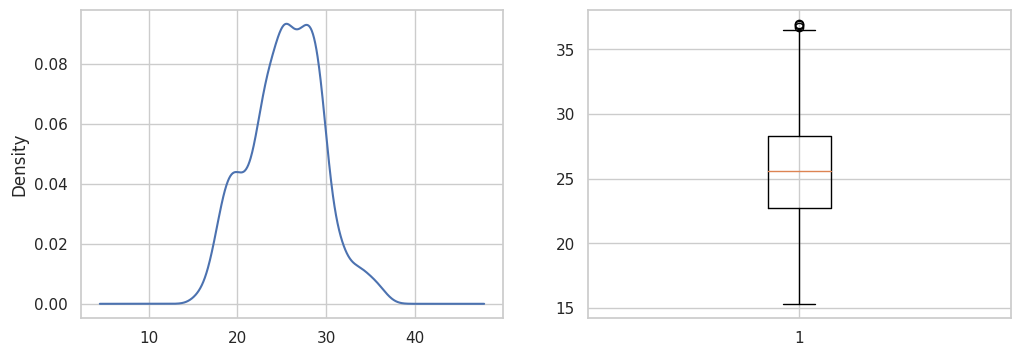

In [130]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

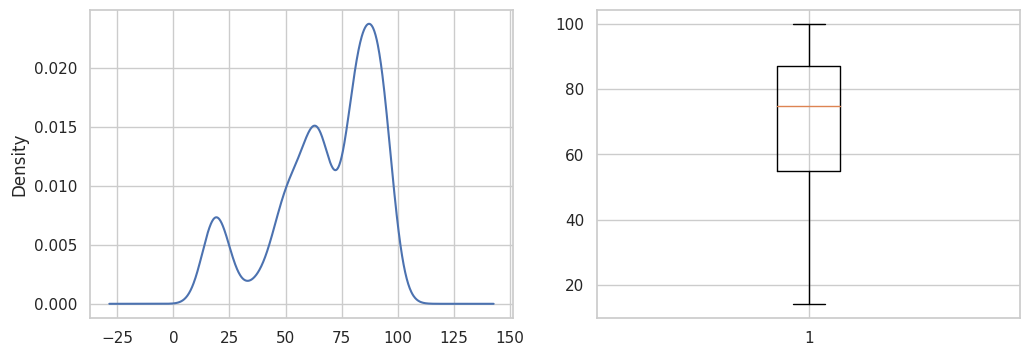

In [131]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

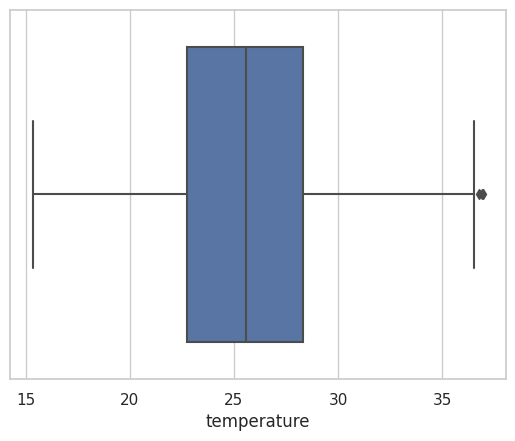

In [132]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

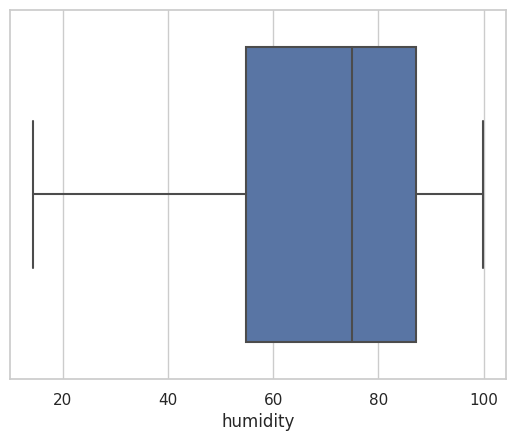

In [133]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [134]:
data_df = data_df.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis = 1)
data_df.head()

,temperature,humidity,label
0,20.879744,82.002744,padi
1,21.770462,80.319644,padi
2,23.004459,82.320763,padi
3,26.491096,80.158363,padi
4,20.130175,81.604873,padi


In [135]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 22.7643368575

Q3:
 28.2982110325

IQR:
 5.533874175000001

Min:
 14.463525594999997

Max:
 36.599022295


In [136]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(1797, 3)

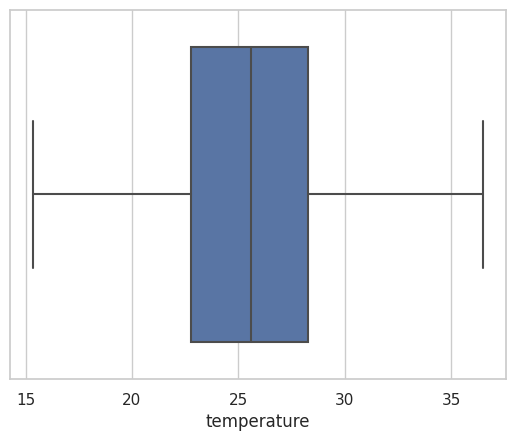

In [137]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [138]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
dtype: int64

In [139]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [140]:
df_clean.value_counts()

temperature  humidity   label        
15.330426    24.915067  kacang merah     1
27.058265    91.105104  kelapa           1
27.536329    89.929082  kacang hijau     1
27.535929    85.570190  kacang hijau     1
27.521856    63.132153  lentil           1
                                        ..
23.768816    90.598103  apel             1
23.761218    93.661643  apel             1
23.750331    92.881605  apel             1
23.738680    75.775038  kapas            1
36.512684    57.928872  kacang polong    1
Length: 1797, dtype: int64

In [141]:
df_clean.tail()

,temperature,humidity,label
1795,26.774637,66.413269,kopi
1796,27.417112,56.636362,kopi
1797,24.131797,67.225123,kopi
1798,26.272418,52.127394,kopi
1799,23.603016,60.396475,kopi


In [142]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 1797
humidity , Unique : 1797
label , Unique : 18


# Visualisasi data

<ipython-input-143-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

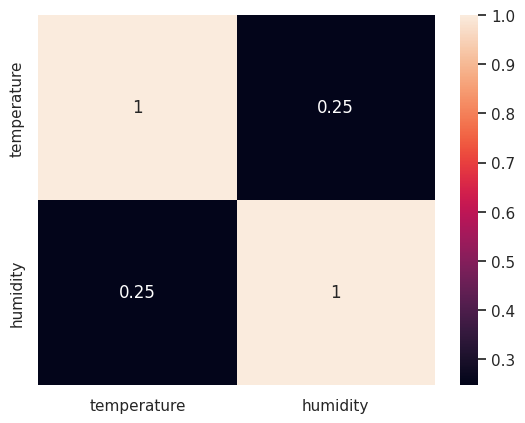

In [143]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [144]:
df_clean.corr()

<ipython-input-144-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity
temperature,1.000000,0.247674
humidity,0.247674,1.000000


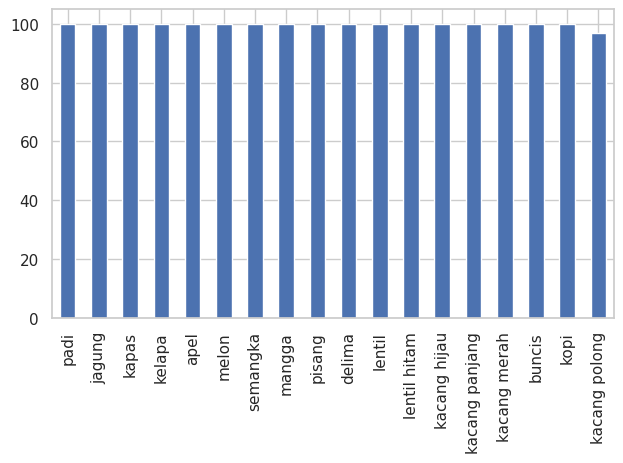

In [145]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

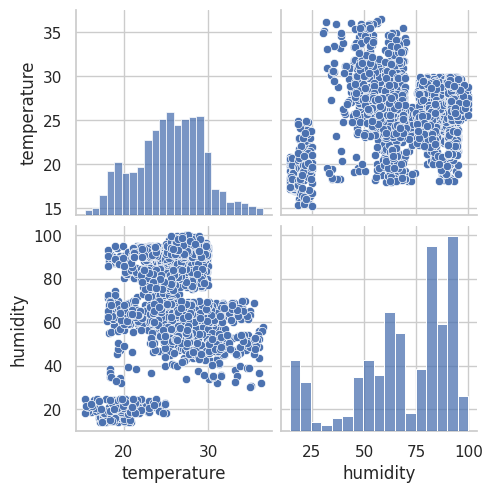

In [146]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [32]:
# X = data_df[data_df.columns[:-1]].values
# y = data_df[data_df.columns[-1]].values

#X.shape

# **Data Sintetik**

In [33]:
# pip install imbalanced-learn scikit-learn

In [163]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# data_res = pd.DataFrame({
#     'temperature': X_res[:, 0],
#     'humidity': X_res[:, 1],
#     'label': y_res
# })

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
padi              100
jagung            100
kapas             100
kelapa            100
apel              100
melon             100
semangka          100
mangga            100
pisang            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang merah      100
buncis            100
kopi              100
kacang polong      97
Name: label, dtype: int64

Jumlah sampel setelah SMOTE:
padi              100
jagung            100
kapas             100
kelapa            100
apel              100
melon             100
semangka          100
mangga            100
pisang            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
Name: label, dtype: int64


# **Klasifikasi model**

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

In [165]:
X = df_clean[['temperature', 'humidity']] #input features ke dalam x
X.head()

,temperature,humidity
0,20.879744,82.002744
1,21.770462,80.319644
2,23.004459,82.320763
3,26.491096,80.158363
4,20.130175,81.604873


In [166]:
y = df_clean['label'] #label masuk ke variabel y
y.head()

0    padi
1    padi
2    padi
3    padi
4    padi
Name: label, dtype: object

# **Split dataset ke training set dan testing set**

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(1440, 2)
(1440,)

testing dataset:
(360, 2)
(360,)


# **Decission tree**

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# Decission tree

In [170]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [171]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.65


**Classification report**

In [172]:
print(classification_report(y_test,predicted_values)) #classification report

                precision    recall  f1-score   support

          apel       0.76      1.00      0.86        22
        buncis       0.71      0.94      0.81        18
        delima       1.00      0.62      0.76        26
        jagung       0.26      0.71      0.38        17
  kacang hijau       0.85      1.00      0.92        22
  kacang merah       0.93      0.65      0.76        20
kacang panjang       0.00      0.00      0.00        13
 kacang polong       0.82      0.47      0.60        19
         kapas       0.62      0.29      0.40        17
        kelapa       1.00      0.84      0.91        25
          kopi       0.52      0.52      0.52        27
        lentil       0.00      0.00      0.00        25
  lentil hitam       0.50      0.76      0.60        21
        mangga       0.61      0.82      0.70        17
         melon       0.80      1.00      0.89        16
          padi       0.49      1.00      0.66        22
        pisang       1.00      0.37      0.54  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion matrix**

In [173]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0 12  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  1  0  0  3  0  3  5  0  0  0  0]
 [ 0  0  0  3  0  0  0  9  0  0  3  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  4  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0 14  0  4  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  2  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  4  0  0  0  3  0  0  0  0  0  0  5  7  0]
 [ 0  0  0  0  0  0  0  0  0  0

In [174]:
from sklearn.model_selection import cross_val_score


In [175]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.66666667, 0.64444444, 0.63509749, 0.66016713, 0.66573816])

# KNN

In [176]:
accuracies = []
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 2)) 

k =  1  => Akurasi =  0.57
k =  2  => Akurasi =  0.53
k =  3  => Akurasi =  0.58
k =  4  => Akurasi =  0.6
k =  5  => Akurasi =  0.62
k =  6  => Akurasi =  0.62
k =  7  => Akurasi =  0.58
k =  8  => Akurasi =  0.62
k =  9  => Akurasi =  0.63
k =  10  => Akurasi =  0.62
k =  11  => Akurasi =  0.62
k =  12  => Akurasi =  0.63
k =  13  => Akurasi =  0.62
k =  14  => Akurasi =  0.61
k =  15  => Akurasi =  0.62
k =  16  => Akurasi =  0.6
k =  17  => Akurasi =  0.6
k =  18  => Akurasi =  0.61
k =  19  => Akurasi =  0.58
k =  20  => Akurasi =  0.59
k =  21  => Akurasi =  0.59
k =  22  => Akurasi =  0.59
k =  23  => Akurasi =  0.59
k =  24  => Akurasi =  0.59


In [177]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.625
                precision    recall  f1-score   support

          apel       0.72      0.95      0.82        22
        buncis       0.71      0.94      0.81        18
        delima       0.84      0.62      0.71        26
        jagung       0.30      0.53      0.38        17
  kacang hijau       0.86      0.82      0.84        22
  kacang merah       0.93      0.65      0.76        20
kacang panjang       0.15      0.15      0.15        13
 kacang polong       0.67      0.42      0.52        19
         kapas       0.45      0.53      0.49        17
        kelapa       1.00      0.72      0.84        25
          kopi       0.50      0.52      0.51        27
        lentil       0.32      0.24      0.27        25
  lentil hitam       0.63      0.57      0.60        21
        mangga       0.67      0.71      0.69        17
         melon       0.73      1.00      0.84        16
          padi       0.61      0.64      0.62        22
        pisang 

# Naive bayes

In [178]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.625
                precision    recall  f1-score   support

          apel       0.70      0.95      0.81        22
        buncis       0.77      0.94      0.85        18
        delima       0.87      0.50      0.63        26
        jagung       0.33      0.53      0.41        17
  kacang hijau       0.90      0.86      0.88        22
  kacang merah       0.94      0.75      0.83        20
kacang panjang       0.25      0.31      0.28        13
 kacang polong       1.00      0.42      0.59        19
         kapas       0.54      0.41      0.47        17
        kelapa       1.00      0.80      0.89        25
          kopi       0.50      0.56      0.53        27
        lentil       0.13      0.08      0.10        25
  lentil hitam       0.56      0.67      0.61        21
        mangga       0.69      0.65      0.67        17
         melon       0.80      1.00      0.89        16
          padi       0.54      0.59      0.57        22
       

# Random forest

In [179]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.6222222222222222
                precision    recall  f1-score   support

          apel       0.76      0.86      0.81        22
        buncis       0.76      0.89      0.82        18
        delima       0.77      0.65      0.71        26
        jagung       0.26      0.35      0.30        17
  kacang hijau       0.86      0.86      0.86        22
  kacang merah       0.88      0.75      0.81        20
kacang panjang       0.18      0.15      0.17        13
 kacang polong       0.57      0.63      0.60        19
         kapas       0.62      0.59      0.61        17
        kelapa       0.83      0.80      0.82        25
          kopi       0.48      0.48      0.48        27
        lentil       0.37      0.28      0.32        25
  lentil hitam       0.60      0.57      0.59        21
        mangga       0.67      0.71      0.69        17
         melon       0.71      0.75      0.73        16
          padi       0.59      0.73      0.65        22
  

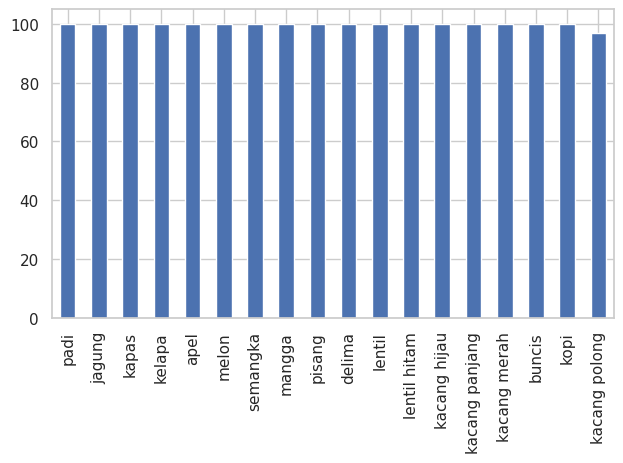

In [162]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()